# Simplex algorithm

![](../../assets/images/simplex_0.jpg "")

## Understanding the algorithm

The simplex algorithm is a widely-used method for solving linear programming (LP) problems, typically involving an objective function and several constraints expressed as inequalities. Its main strengths lie in its systematic approach to exploring solutions and its efficiency in solving a wide range of optimization problems.

Here is an overview of the simplex algorithm and its steps:

1. **Objective Function and Constraints**: The algorithm begins by formulating the problem with an objective function to maximize or minimize, subject to constraints. These constraints are usually inequalities involving the decision variables.

2. **Standard Form Conversion**: The problem is converted to a standard form. This involves introducing new variables for each constraint to transform inequalities into equalities. For instance, slack variables are added to less-than-or-equal-to constraints, and surplus variables to greater-than-or-equal-to constraints. This standard form is essential for the algorithm to process the problem effectively.

3. **Initial Simplex Tableau**: The next step is to create an initial simplex tableau. This tableau is a matrix representation of the objective function and constraints, including the newly introduced slack and surplus variables. The tableau helps in organizing and performing calculations systematically.

4. **Iterative Process**: The algorithm then enters an iterative process. It starts at a corner point of the feasible region (defined by the constraints) and moves along the edges of this region to adjacent extreme points. At each step, it evaluates whether moving to a new extreme point increases the value of the objective function.

5. **Pivot Operation**: In each iteration, a pivot operation is performed. This involves choosing a column (entering variable) and a row (leaving variable) in the tableau. The entering variable is selected based on which variable can most increase the objective function value, and the leaving variable is chosen based on a minimum ratio rule to maintain the feasibility of the solution.

6. **Test for Optimality**: After each iteration, a test for optimality is performed. If the solution is optimal (no further improvement is possible), the algorithm terminates. If not, the algorithm repeats the pivot operation with updated values.

7. **Termination**: The algorithm terminates when it either finds an optimal solution or determines that no feasible solution exists. In some cases, it may also conclude that the objective function is unbounded for the given constraints.

This method is particularly effective for problems involving many variables and constraints, which are common in real-world scenarios. While it can be computationally intensive for very large problems, in most practical applications, it converges to the optimal solution efficiently.

## Usage examples

1. **Mathematical and Programming Problems**: The Simplex method is extensively used in many programming problems. Non-linear programming (NLP) problems often rely on the Simplex method to find solutions, especially when linear constraints are involved. In cases where non-linear problems cannot be solved effectively, they are often linearized to LP and then solved using the Simplex method. This method is also useful in supporting solutions derived from LP's theorems, such as Farkas' theorem, or in solving other problems like Quadratic Programming (QP) that have linear constraints.

2. **Industrial Planning and Optimization**: Various industries utilize the Simplex method for planning under constraints. In agricultural contexts, for instance, farmers use it to allocate resources optimally to maximize profits. Constraints such as policy restrictions, budget concerns, and farmland area are considered, and profits are often linearly related to farm production, forming LP problems. Similarly, enterprises employ the Simplex method for developing rational marketing and sales strategies, where factors like cost and profit are linearly dependent on production. These applications showcase the method's ability to handle complex, multi-variable optimization problems in a real-world context.

3. **Engineering, Finance, and Operations Research**: The Simplex algorithm has diverse applications in fields like engineering, finance, and operations research. It has been used for problems ranging from scheduling airline flights to designing manufacturing processes. These applications benefit from the algorithm's ability to efficiently handle large-scale linear programming problems, providing optimal solutions within a feasible region defined by a system of linear inequalities.

4. **Efficient Operation and Quick Solution Finding**: The Simplex algorithm is known for its efficiency in solving linear programs, with the capability to handle problems with approximately 1000 variables and constraints within fractions of a second. This makes it a highly valuable tool in professional and industrial settings where quick and accurate optimization solutions are needed.

5. **General Applicability in Linear Programming**: The Simplex algorithm operates on linear programs in canonical form, systematically exploring the edges of a polytope (a geometric representation of the feasible solution space) to find the optimal solution. This process involves moving from vertex to vertex (each representing a possible solution) along the edges of the polytope until the vertex corresponding to the optimal solution is reached. The algorithm is designed to terminate once it either finds this optimal solution or determines that no solution exists, making it a robust tool for a wide array of linear optimization problems.

## Strengths

1. **Efficiency for Complex Problems:** The Simplex method is notably faster than other algorithms when solving linear systems involving many variables. Its efficiency is particularly important in computer programming, where it significantly reduces the need for processing power. This efficiency becomes crucial in handling complex problems that may involve hundreds of equations and thousands of variables​​.

2. **Applicability Beyond Graphical Methods:** Graphical methods are limited to problems with no more than three variables, as higher-dimensional problems cannot be visualized using them. The Simplex method overcomes this limitation, applying effectively where graphical methods cannot. This makes the Simplex method highly versatile, capable of handling problems in higher dimensions and with more complex constraints​.

3. **Systematic Procedure and Finite Computation:** The Simplex method provides a systematic procedure for testing possible solutions, represented by the vertices of a polygonal region defined by inequalities. The method ensures that the solution, if it exists, is typically at one of these vertices. This systematic approach reduces the problem to a finite computation, despite the potentially astronomical number of extreme points involved in complex linear programs. George Dantzig's invention of the Simplex method in 1947 aimed to restrict the number of extreme points needing examination, making it one of the most efficient algorithms for solving optimization problems on computers​.

4. **Phased Approach to Solutions:** The solution process of a linear program using the Simplex algorithm is accomplished in two steps: Phase I involves finding a starting extreme point, and Phase II applies the Simplex algorithm using this point as a starting point. This phased approach ensures that the algorithm either finds an optimum basic feasible solution or concludes that the problem is infeasible or unbounded. This clarity in process and outcomes contributes to the robustness and reliability of the Simplex method in practical applications​.

5. **Effective Handling of Optimization Problems:** The Simplex method is particularly effective for systems where behavior can be modeled with linear functions. Its applicability spans numerous applications in economics, such as optimizing prices given supply and demand, as well as in scientific contexts, like monitoring predator-prey dynamics. This broad applicability underlines the method's utility in various practical scenarios where linear relationships are key​.

## Weaknesses

1. **Complexity for Large Problems**: While the simplex method is highly efficient and effective for many optimization problems, it can struggle with very large linear programs. This is because the number of extreme points (vertices of the polytope) that need to be examined increases significantly with the size of the problem, making the computation unmanageable for large-scale problems.

2. **Phase I Complexity**: The simplex algorithm involves two phases. In Phase I, a starting extreme point is found. This step can be trivial for some programs but generally requires applying the simplex algorithm to a modified version of the original program, which can be complex and time-consuming.

3. **Dependence on Initial Extreme Point**: The method assumes that an initial extreme point is known. If not, a variant of the simplex method, called Phase I, is used to find one or determine if no feasible solutions exist. This dependency on the initial point can be a limitation in certain scenarios.

4. **Potential for Exponential Steps**: In theory, the number of steps required by the simplex method can grow exponentially with the number of extreme points. Although in practice it often converges on the optimal solution in a small multiple of the number of extreme points, there's a theoretical possibility of it requiring a significantly larger number of steps, especially in complex problems.

5. **Handling Unbounded Edges**: In cases where one can move along an edge and make the objective function value increase without bound, the simplex method terminates with a prescription of the edge along which the objective goes to infinity. This means that in cases of unbounded edges, the simplex algorithm concludes that the problem has no solution.

It's important to note that despite these limitations, the simplex method remains one of the most useful and widely employed algorithms for solving linear optimization problems, especially when the problems are not excessively large or complex.

## Python demonstration

### Optimal Product Mix Analysis Using the Simplex Algorithm

Following simplex implementation is designed to solve a specific linear programming problem involving the optimization of product quantities for maximum earnings.

Goal is to maximize total profit by producing the good amount of each product.

- **Products**: 
  - Shoes
  - T-shirts
  - Jeans
  - Socks

- **Profit per Unit**:
  - Shoes: $200
  - T-shirts: $45
  - Jeans: $60
  - Socks: $15
- **Required Resources per Unit** (in resource units):
  - Shoes: 5 of leather, 2 of plastic, 1 of cotton
  - T-shirts: 3 of leather, 3 of plastic, 2 of cotton
  - Jeans: 4 of leather, 0 of plastic, 3 of cotton
  - Socks: 2 of leather, 2 of plastic, 4 of cotton
- **Available Resources**:
  - Leather: 100 units
  - Plastic: 90 units
  - Cotton: 120 units

#### Constraints
1. The use of resources must not exceed the available quantities.
2. The quantities of each product must be positive or zero.

#### Notes
- The coefficients in `c` represent the profits per unit for each product.
- The matrix `A` and the vector `b` represent the constraints related to resource utilization.
- In a real scenario, you would also need to manage aspects such as the selection of the entering and leaving variables, degenerate cases, and unbounded solutions in the implementation of the simplex.


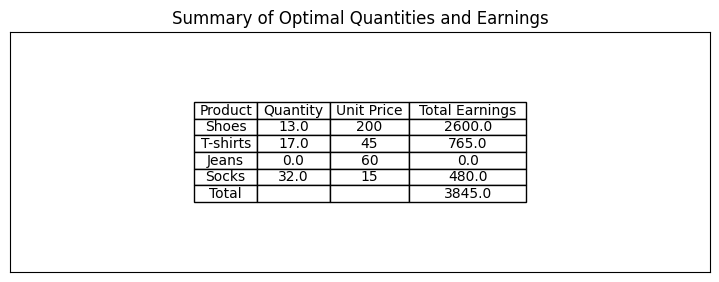

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def simplex(A, b, c):
    nrows, ncols = A.shape
    X = np.zeros(ncols)
    basis = [False] * ncols

    basis[-nrows:] = [True] * nrows
    B_inv = np.linalg.inv(A[:, basis])

    while True:
        X[basis] = np.dot(B_inv, b)
        X = np.maximum(X, 0)

        reduced_costs = c - np.dot(np.dot(c[basis], B_inv), A)
        if all(reduced_cost >= 0 for reduced_cost in reduced_costs):
            rounded_solution = np.maximum(np.round(X), 0)
            return rounded_solution

        entering = np.where(reduced_costs < 0)[0][0]
        delta = np.dot(B_inv, A[:, entering])
        if all(d <= 0 for d in delta):
            raise Exception("Problem is unbounded.")

        ratios = [X[basis_var]/delta_var for basis_var, delta_var in zip(range(ncols), delta) if delta_var > 0]
        leaving = np.where(basis)[0][np.argmin(ratios)]

        basis[leaving] = False
        basis[entering] = True
        B_inv = np.linalg.inv(A[:, basis])

# Define product names and other parameters
product_names = ["Shoes", "T-shirts", "Jeans", "Socks"]
c = np.array([200, 45, 60, 15]) # products prices 
A = np.array([
    [5, 3, 4, 2],
    [2, 3, 0, 2],
    [1, 2, 3, 4]
    ]) # Required Resources per Unit
b = np.array([100, 90, 120]) # Available ressources

# Solve the linear programming problem
optimal_values = simplex(A, b, -c)
optimal_quantities = dict(zip(product_names, optimal_values))
product_prices = dict(zip(product_names, c))
total_earned = sum(optimal_quantities[product] * product_prices[product] for product in product_names)

# Prepare data for the summary table
products = list(optimal_quantities.keys())
quantities = [optimal_quantities[product] for product in products]
prices = [product_prices[product] for product in products]
earnings = [quantities[i] * prices[i] for i in range(len(products))]



### Plotting 

# Creating the summary table using Matplotlib
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
plt.subplots_adjust(left=0.1, right=0.8, top=0.8, bottom=0.2)

ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
table_data = [["Product", "Quantity", "Unit Price", "Total Earnings"]] + \
             [[products[i], quantities[i], prices[i], earnings[i]] for i in range(len(products))] + \
             [["Total", "", "", total_earned]]
table = ax.table(cellText=table_data, loc='center', cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(table_data[0]))))
plt.title("Summary of Optimal Quantities and Earnings")
plt.show()

🚨 **Independent Constraints Required**

<div class="alert alert-block alert-warning">
When using the Simplex algorithm for linear programming, ensure your constraints (matrix `A`) are independent. A singular (non-invertible) matrix, caused by dependent constraints, leads to computational errors. Check this by ensuring the matrix's rank equals its number of columns. Adjust your constraints if necessary to avoid singularity issues.
</div>

### Optimizing Product Mix for Maximum Profit with Simplex Algorithm

#### Summary of the Updated Linear Programming Resolution

Following linear programming problem involves a company producing two products (A and B) with the objective of maximizing profit. The problem was expanded by adding two additional constraints, leading to a total of four constraints:

1. **Labor Constraint:** $ 3x + 2y \leq 18 $
2. **Machine Time Constraint:** $ 2x + y \leq 12 $
3. **Marketing Constraint:** $ y \geq 2x $
4. **Supply Constraint:** $ y \leq 6 $

The non-negativity constraints $ x, y \geq 0 $ were also included. The objective function is to maximize $ Z = 50x + 40y $, where $ x $ and $ y $ are the units of Products A and B, respectively.

Using Python, specifically the `scipy.optimize.linprog` function, the problem is solved with scipy simplex algorithm. <br> 
This approach identified the optimal production quantities of Products A and B that maximize profit within the given constraints.

This visual representation is helpful for understanding the effects of constraints on the feasible region and the location of the optimal solution within this region.

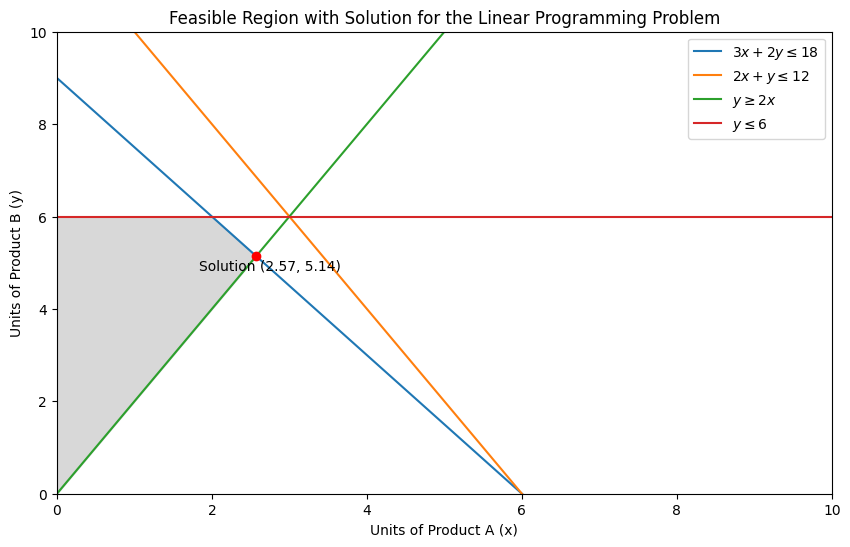

In [59]:
from scipy.optimize import linprog

# Objective function coefficients (for maximization)
c = [-50, -40]

# Coefficients of the inequality constraints (LHS)
A = [[3, 2], [2, 1], [-2, 1], [0, 1]]

# Constants in the inequality constraints (RHS)
b = [18, 12, 0, 6]

# Bounds for each variable
bounds = [(0, None), (0, None)]

# Solve the problem
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs-ds')


### Plotting

x_vals = np.linspace(0, 10, 400)
y1 = (18 - 3*x_vals) / 2
y2 = 12 - 2*x_vals
y3 = 2*x_vals
y4 = np.full_like(x_vals, 6)

plt.figure(figsize=(10, 6))

plt.plot(x_vals, y1, label=r'$3x + 2y \leq 18$')
plt.plot(x_vals, y2, label=r'$2x + y \leq 12$')
plt.plot(x_vals, y3, label=r'$y \geq 2x$')
plt.plot(x_vals, y4, label=r'$y \leq 6$')

# Feasible region
y_lower = np.maximum(y3, 0)
y_upper = np.minimum(np.minimum(y1, y2), y4)
plt.fill_between(x_vals, y_lower, y_upper, where=(y_upper>=y_lower) & (x_vals>=0), color='gray', alpha=0.3)

# Solution
plt.plot(result.x[0], result.x[1], 'ro') # Optimal point
plt.annotate(f'Solution ({result.x[0]:.2f}, {result.x[1]:.2f})', (result.x[0], result.x[1]), textcoords="offset points", xytext=(10,-10), ha='center')

plt.xlabel('Units of Product A (x)')
plt.ylabel('Units of Product B (y)')
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.legend()
plt.title('Feasible Region with Solution for the Linear Programming Problem')
plt.show()

<div class="alert alert-block alert-info">
Since the basic simplex method is being deprecated in the scipy library, the Dual revised simplex (highs-ds) is used instead.
</div>

End of demonstration

---

## Practical optimization tools

1. [**PuLP (Python):**](https://coin-or.github.io/pulp/) PuLP is an open-source linear programming (LP) package for Python. It provides a nice Python interface for formulating LP and MIP problems and integrates with several of the major open-source and commercial solvers, including CBC, GLPK, and Gurobi. PuLP is known for its user-friendly interface, making it particularly accessible for those new to linear programming or optimization in Python.

2. [**COIN-OR (C++):**](https://github.com/coin-or/Clp)  The Computational Infrastructure for Operations Research (COIN-OR) is an initiative to provide open-source software for the operations research community. Within COIN-OR, the Clp (Coin-or linear programming) solver implements the simplex algorithm and is written in C++. It's known for its high performance and is used in both academic research and industry. The other [COIN-OR projects](https://www.coin-or.org/projects/).

3. [**GLPK (GNU Linear Programming Kit):**](https://www.gnu.org/software/glpk/)  GLPK is a set of routines written in C for solving large-scale linear programming (LP), mixed integer programming (MIP), and other related problems. It includes a simplex algorithm implementation and is renowned for its straightforward, no-frills approach to LP and MIP problems.

4. [**lp_solve (ANSI C):**](https://lpsolve.sourceforge.net/)  A dedicated library for linear programming, lp_solve supports various algorithms including the simplex method. Written in ANSI C, it is designed to be highly portable and can be used as a standalone program or as a library in other applications. Its flexibility and ease of integration make it a popular choice for developers working on optimization problems.

5. [**Apache Commons Math (Java):**](https://commons.apache.org/proper/commons-math/)  Part of the Apache Commons project, this Java library provides tools for mathematics and statistics. It includes utilities for optimization, and while primarily focused on nonlinear optimization, it can be used for linear problems as well. Its integration with Java makes it a go-to choice for developers in the Java ecosystem seeking optimization tools.

## Sources

| Sources |
| ------- |
| [Simplex algorithm - Wikipedia](https://en.wikipedia.org/wiki/Simplex_algorithm) |
| [Simplex algorithm - Cornell University](https://optimization.cbe.cornell.edu/index.php?title=Simplex_algorithm) |
| [Simplex method - Britannica](https://www.britannica.com/topic/simplex-method) |
| [Maximization By The Simplex Method - Libretexts Mathematics](https://math.libretexts.org/Bookshelves/Applied_Mathematics/Applied_Finite_Mathematics_(Sekhon_and_Bloom)/04%3A_Linear_Programming_The_Simplex_Method/4.02%3A_Maximization_By_The_Simplex_Method) |
| [Simplex Method for Solution of L.P.P (With Examples) - Engineeringenotes ](https://www.engineeringenotes.com/linear-programming/simplex-method-for-solution-of-l-p-p-with-examples-operation-research/15373) |
| [Linear Programming Advantages in the Simplex Method - eHow](https://www.ehow.co.uk/facts_7958922_linear-programming-advantages-simplex-method.html) |
| [A Beginner’s Guide to Linear Programming and the Simplex Algorithm - Towardsdatascience](https://towardsdatascience.com/a-beginners-guide-to-linear-programming-and-the-simplex-algorithm-87db017e92b4) |
| [The Network Simplex Algorithm - Springer link](https://link.springer.com/chapter/10.1007/978-3-642-32278-5_11) |
| [Introduction picture](http://www.mathouriste.eu/Fourier/Fourier_pgm_lin.html) |
| [Dual revised simplex - SciPy](https://docs.scipy.org/doc/scipy/reference/optimize.linprog-highs-ds.html) |
